## Final Project Submission

Please fill out:
* Student name: Agape Nderitu Gichuki
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: William Okomba 
* Blog post URL:


### Introduction
As a data scientist I have been tasked by Microsoft to run exploratory data analysis and generate business insights for their new movie studio venture.

### Business Understanding
Microsoft wants to enter the movie industry by creating a new movie studio, but they lack knowledge and expertise in the field. They recognize the trend of big companies creating original video content and want to capitalize on the opportunity. To achieve this, they need to understand the types of films that are currently successful at the box office and translate those findings into actionable insights that can guide the development of their own movies. The goal is to identify the most lucrative film genres and themes to maximize the success of their new movie studio.

### Data Understanding
The data sources for this analysis will be pulled from the following data files
* `im.db.zip`
  * **Contents**
      ![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)

  * **Format** - It is formatted in a database with the above tables.
        
* `tn.movie_budgets.csv.gz`
  * **Contents**
      The dataset contains the following columns id, release_date, movie, production_budget, domestic_gross and the worldwide_gross.
  * **Format** - The values are comma separated thus a CSV file. 
      
   
In the folder Data are movie datasets from:
* [IMDB](https://www.imdb.com/)
* [The Numbers](https://www.the-numbers.com/)

Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values).


### Getting the Data

Below we import the modules necessary modules for viewing the `im.db.zip` and `tn.movie_budgets.csv.gz`.


In [1]:
#import sq3lite and pandas
import sqlite3
import pandas as pd

In [38]:
# Open the relevant files
#Connect to the database im.db
conn = sqlite3.connect('data/im.db')
# append csv file to the dataframe movie_budgets
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

### **1. Types of films that are currently succesful.**
The first order of business is getting to know the type of movies that have done well in the box office. This will be coupled with insights on the best directors and writers based on experience in number of movies they have worked in. The `im.db.zip` shall come in necessary for this with sql and python's pandas, matplotlib and seaborn being used for data exploration, cleaning, analysis and visualization.

#### 1.1 Extracting the needed data

The first extraction is done using sql and the movie_id, primary_title, genres ,runtime_minutes and averagerating shall be selected from the movie_basics and the movie_ratings tables sing the movie_id column as the key in the im_db database. After the selection is done the result is appended into a dataframe.

In [39]:
#using sql to specify the needed columns from different columns in different tables.
#Using pandas to store the above extracted information in a dataframe; runtime_genre_rating.
runtime_genre_rating = pd.read_sql("""SELECT movie_id, primary_title, genres ,runtime_minutes, averagerating
                                            FROM movie_basics
                                            JOIN movie_ratings
                                            USING (movie_id);
                                    """,conn )

The second and third extractions also use sql to select necessary collumns and use sql methods and functions to create the needed columns that are then appended to the dataframe.

In [4]:
#using sql to specify the needed columns from different columns in different tables by use of arithmetic functions,
#JOIN and ORDER BY methods. 
#Using pandas to store the above extracted information in a dataframe; directors rating.
directors_rating = pd.read_sql (""" SELECT primary_name,
person_id ,movie_id,COUNT(averagerating)AS number_of_movies_rated,
SUM(averagerating) AS total_movie_rating,
SUM(averagerating)/COUNT(averagerating) AS total_average_rating 
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
JOIN directors
USING (movie_id)
JOIN persons
USING (person_id)
GROUP BY person_id
HAVING number_of_movies_rated > 20
ORDER BY total_average_rating DESC;	

 """,conn)

In [129]:
#using sql to specify the needed columns from different columns in different tables by use of arithmetic functions,
#JOIN and ORDER BY methods. 
#Using pandas to store the above extracted information in a dataframe; writers rating.
writers_rating = pd.read_sql (""" SELECT primary_name,
person_id ,movie_id,COUNT(averagerating)AS number_of_movies_rated,
SUM(averagerating) AS total_movie_rating,
SUM(averagerating)/COUNT(averagerating) AS total_average_rating 
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
JOIN writers
USING (movie_id)
JOIN persons
USING (person_id)

GROUP BY person_id
HAVING number_of_movies_rated> 20
ORDER BY total_average_rating DESC;	

 """,conn)


#### 1.2 Cleaning the data
* The runtime_genre_rating has null values and outlier that need to be dealt with.
* The dataframes directors_rating and writers_rating has no null values and the outliers are valid in the analysis being   done. On this step unnecessary columns that were done using sql to anylyse data and come up with much needed columns necessary for the visualization of the two dataframes are dropped.

In [6]:
#check null values in the runtime_genre_rating dataframe
runtime_genre_rating.isna().sum()

movie_id              0
primary_title         0
genres              804
runtime_minutes    7620
averagerating         0
dtype: int64

In [7]:
# drop and confirm null values are dropped
runtime_genre_rating.dropna(inplace=True)
runtime_genre_rating.isna().sum()

movie_id           0
primary_title      0
genres             0
runtime_minutes    0
averagerating      0
dtype: int64

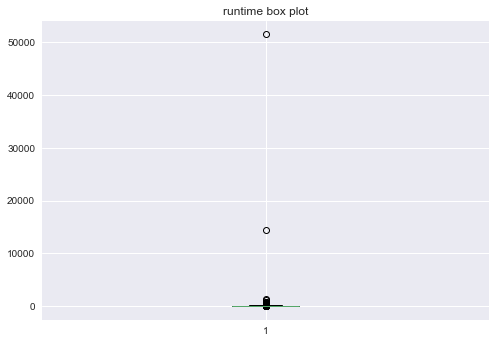

In [8]:
#check outliers in the runtime_genre_rating dataframe using the boxplot
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.boxplot(runtime_genre_rating.runtime_minutes)
plt.title('runtime box plot')
plt.show()

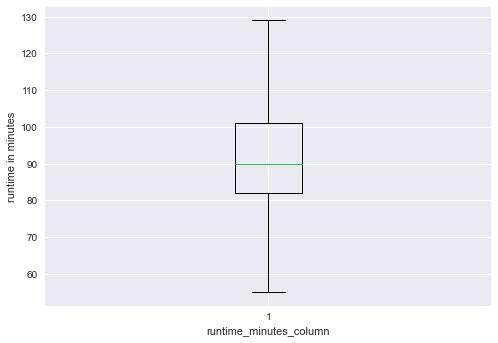

In [9]:
#remove outliers in the runtime_genre_rating dataframe
runtime_genre_rating = runtime_genre_rating[runtime_genre_rating['runtime_minutes'].isin(range(55,130))]
plt.style.use('seaborn')
plt.boxplot(runtime_genre_rating.runtime_minutes)
plt.ylabel('runtime in minutes')
plt.xlabel('runtime_minutes_column')
plt.show()

In [10]:
#create a data frame genre_rating from runtime_genre_rating by dropping a column
genre_rating = runtime_genre_rating.drop(['runtime_minutes'], axis=1)
#making sure there are no null values and duplicates by dropping them
genre_rating = genre_rating.dropna()
genre_rating = genre_rating.drop_duplicates()
genre_rating

,movie_id,primary_title,genres,averagerating
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,Drama,6.9
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5
6,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",8.1
8,tt0154039,So Much for Justice!,History,4.6
...,...,...,...,...
73848,tt9910930,Jeg ser deg,"Crime,Documentary",6.1
73850,tt9913056,Swarm Season,Documentary,6.2
73851,tt9913084,Diabolik sono io,Documentary,6.2
73852,tt9914286,Sokagin Çocuklari,"Drama,Family",8.7


In [11]:
#remove unnecessary columns in the directors_rating and writers_rating 
directors_rating = directors_rating.drop(["person_id","movie_id",'number_of_movies_rated','total_movie_rating'],axis=1)
writers_rating = writers_rating.drop(["person_id","movie_id",'number_of_movies_rated','total_movie_rating'],axis=1)

#### 1.3 Data Analysis

In [12]:
#create a genre_counts that counts the number of times a genre appears and limits it to the first 30 as they are arranged in decending order
genre_counts = genre_rating.genres.value_counts().head(30)
#create a list based on the genre_counts
select = [
    'Drama',
'Documentary',
'Comedy',
'Comedy,Drama',
'Horror',
'Drama,Romance',
'Thriller',
'Comedy,Drama,Romance',
'Comedy,Romance',
'Horror,Thriller',
'Drama,Thriller',
'Biography,Documentary',
'Action', 
'Documentary,Drama',
'Documentary,Music',
'Comedy,Horror',
'Crime,Drama,Thriller',
'Action,Crime,Drama',
'Biography,Documentary,History',
'Crime,Drama',
'Drama,Family',
'Documentary,History',
'Romance',
'Family',
'Horror,Mystery,Thriller',
'Biography,Documentary,Drama',
'Drama,Horror,Thriller',
'Drama,Mystery,Thriller',
'Comedy,Drama,Family', 
'Animation'      
] 
#use the list to get the rows in the genre_rating 
genre_rating =genre_rating[genre_rating['genres'].isin(select)]
#use the groupby method to get mean of the above genres in a series for visualization
genre_rating_series = genre_rating.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
genre_rating_series

genres
Biography,Documentary,Drama      7.480588
Biography,Documentary,History    7.421346
Documentary,Music                7.401807
Documentary,History              7.389055
Documentary,Drama                7.335294
Documentary                      7.251889
Biography,Documentary            7.189109
Drama,Family                     6.605516
Drama                            6.458889
Comedy,Drama                     6.368016
Comedy,Drama,Family              6.367537
Crime,Drama                      6.329787
Comedy,Drama,Romance             6.275528
Drama,Romance                    6.238627
Crime,Drama,Thriller             6.072406
Drama,Thriller                   6.055849
Drama,Mystery,Thriller           5.989437
Family                           5.977662
Romance                          5.959949
Action,Crime,Drama               5.884459
Comedy,Romance                   5.828898
Animation                        5.808647
Comedy                           5.754311
Action                     

#### 1.4 Visualization
This section visualizes the top directors, top writers and top movie genres. 

##### 1.4.1 - Top 30 genres according to their rating. 

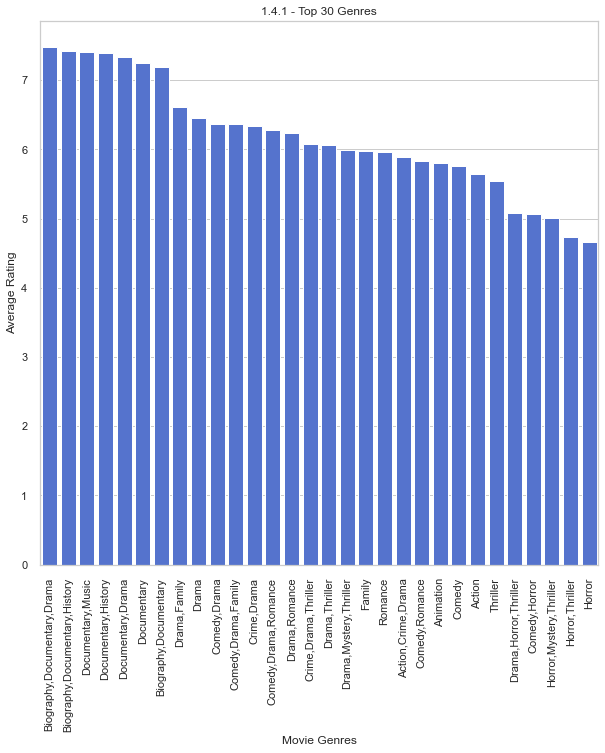

In [132]:
# plot the bargraph from the genre_rating_series
import seaborn as sns
sns.set(style = 'whitegrid')
fig,ax = plt.subplots( figsize=(10,10))
sns.barplot(data=genre_rating_series,
            x=genre_rating_series.index,y= genre_rating_series.values,
            order= genre_rating_series.values,
            color='royalblue')
plt.xticks(range(len(genre_rating_series)), genre_rating_series.index,rotation=90)
sns.set_color_codes('muted')
plt.xlabel('Movie Genres')
plt.ylabel('Average Rating')
plt.title('1.4.1 - Top 30 Genres')
plt.show()

##### 1.4.2 Top 10 Directors according to their average rating
The directors are have been chosen if they have directed more than 20 movies.

''

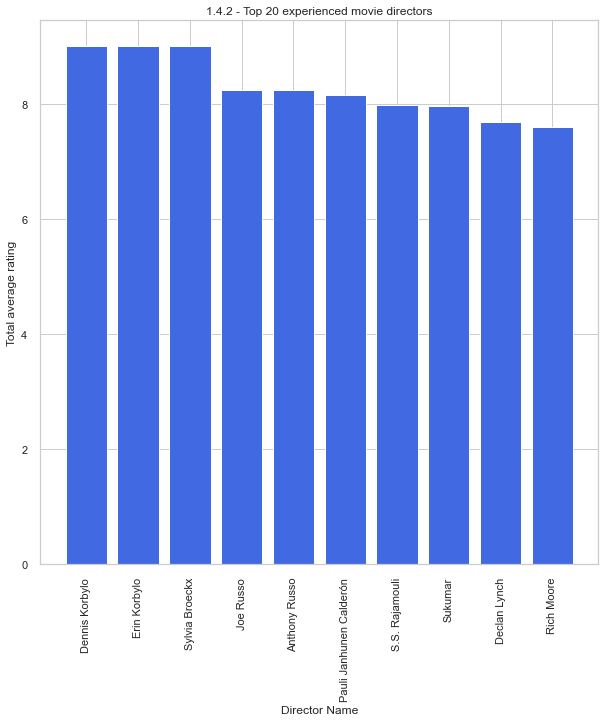

In [133]:
directors_rating = directors_rating.head(10)
fig,ax = plt.subplots( figsize=(10,10))
plt.bar(directors_rating.primary_name,directors_rating.total_average_rating, color = 'royalblue')
plt.xticks(rotation=90)
plt.xlabel('Director Name')
plt.ylabel('Total average rating')
plt.title('1.4.2 - Top 20 experienced movie directors')
;

##### 1.4.3 Top 10 writers according to their average rating
The writers are have been chosen if they have directed more than 50 movies.

''

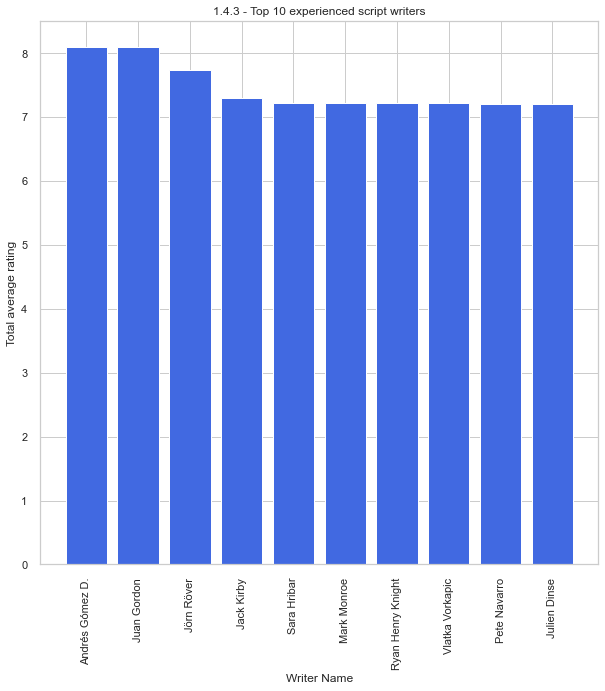

In [134]:
writers_rating = writers_rating.head(10)
fig,ax = plt.subplots( figsize=(10,10))
plt.bar(writers_rating.primary_name,writers_rating.total_average_rating, color = 'royalblue')
plt.xticks(rotation=90)
plt.xlabel('Writer Name')
plt.ylabel('Total average rating')
plt.title('1.4.3 - Top 10 experienced script writers')
;

#### 1.5 Conclusions

* Barplot 1.4.1 shows the best perorming genres and genre combinations that give the highest number of ratings which means they are more succesful.
* Barplot 1.4.2 shows the best 10 performing directors according to experience of more than 20 movies directed by comparing the average rating their movies.    
* Barplot 1.4.3 shows the best 10 performing writers according to experience of more than 100 movies written by comparing the average rating their movies.

### **2.The Budget and its relationship with the total revenue and profits.**
In this data exploration and analysis, the relationship between the amount of money invested in a movie's production and the revenue earned, which also give insight on the profit as this is also a business looking to get profit.


#### 2.1 Extracting the needed data
Data is extracted the same time it is accessed by the pandas.

In [60]:
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

#### 2.2 Cleaning the data

In [61]:
# Check the data types of the dataframe
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [62]:
#remove unnecessary colmns in the dataframe
movie_budgets.drop(['id','release_date'], axis= 1, inplace= True)

In [63]:
#check null values
movie_budgets.isna().sum()

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [64]:
#check duplicated values
movie_budgets.duplicated().sum()

0

In [65]:
#remove $ sign from production_budget, domestic_gross and worldwide_gross values
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$','')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$','')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$','')

#remove commmas from production_budget, domestic_gross and worldwide_gross values
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',','')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',','')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',','')

#change the datatypes of production_budget, domestic_gross and worldwide_gross columns to relevant datatypes
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(int)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)

In [66]:
#drop all 0 values in the database
movie_budgets = movie_budgets.loc[~((movie_budgets['production_budget'] == 0) | (movie_budgets['domestic_gross'] == 0) | (movie_budgets['worldwide_gross'] == 0))]

In [68]:
#add total_gross column in the dataframe that is the total values of domestic_gross and worldwide_gross
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']
#add gross_profits column in the dataframe that is the difference between total_gross and domestic_gross
movie_budgets['gross_profits']= movie_budgets['total_gross'] - movie_budgets['production_budget']

In [69]:
#drop domestic_gross and worldwide_gross
movie_budgets.drop(['domestic_gross','worldwide_gross'], axis= 1, inplace= True)


#### 2.3 Data Analysis
Using correlation to show how movie production budgets affect the the total gross revenue and the gross profits

In [70]:
# check correlation in movie_budgets
corr = movie_budgets.corr()['production_budget']
corr

production_budget    1.000000
total_gross          0.735547
gross_profits        0.638791
Name: production_budget, dtype: float64

Strong positive correlation on both columns compared to the production_budget column basically means that as the production_budget increases so does the gross revunue and profits increase.

### 2.4 Visualization

### 2.4.1 Scatter Plot showing the relationship between the production budget versus the total revenue and gross profits.

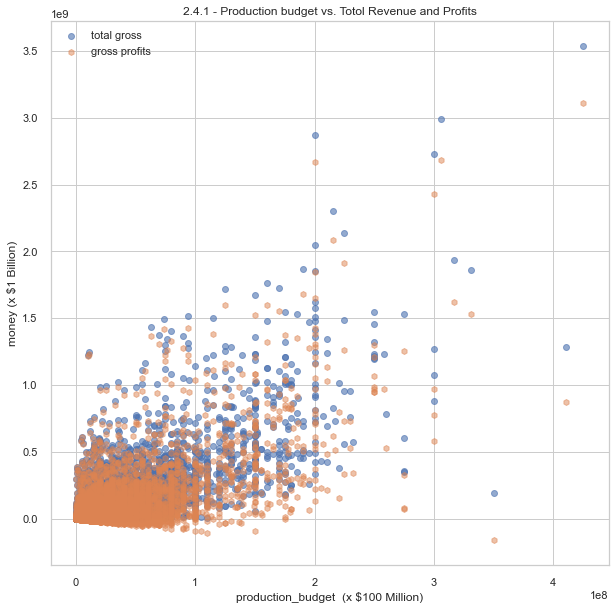

In [135]:
#plots the graph described above
x = movie_budgets['production_budget']
y = movie_budgets['total_gross']
z = movie_budgets['gross_profits']
fig,ax = plt.subplots(figsize = (10,10))
plt.scatter(x, y, label = 'total gross', alpha=0.6,marker='o')
plt.scatter(x, z, label = 'gross profits',alpha=0.5,marker='h')
ax.set_xlabel('production_budget  (x $100 Million)')
ax.set_ylabel('money (x $1 Billion)')
plt.title('2.4.1 - Production budget vs. Totol Revenue and Profits')
plt.legend()
plt.show()

The above scatter plot shows that chances of getting higher gross revenue and gross profits are high after investing a significant ammount of money on the production budget.

### 2.4.2 - A Bargraph showing where most movies' budgets lie and the mean production budgets.

34033480.04948414


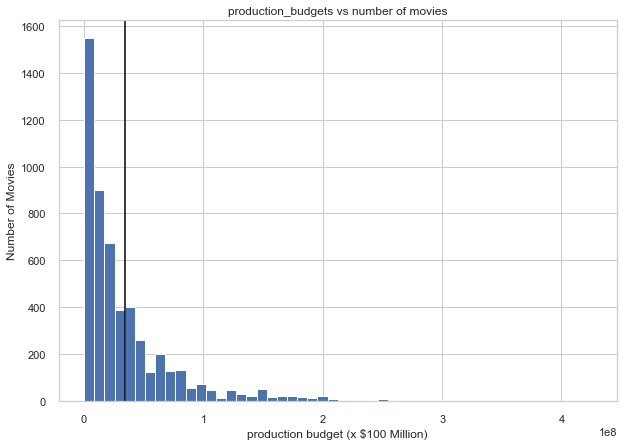

In [136]:
#calculates the mean of the production budget and plots the graph showing movie budgets and the movies and where the mean is.
ax = movie_budgets.production_budget.plot.hist(title ="production_budgets vs number of movies",figsize=(10,7), bins = 50)
mean = movie_budgets.production_budget.mean()
ax.set_xlabel('production budget (x $100 Million)')
ax.axvline(mean, color="black")
ax.set_ylabel('Number of Movies') 
print(mean)

#### 2.5 Conclusions
* The data analysis (statisical) calculates the correlation and the results are a strong positive correlation on both total gross revenue and gross profits compared to the production_budget columns which basically means that as the production_budget increases so does the gross total revenue and profits increase.
* Scatter plot 2.4.1 shows that the higher the production budget the higher the profits and the total gross revenue.
* Histogram 2.4.2 shows that the most movies have low budgets with the mean being around $34M.

### **3.The runtime most movies have.**
This is the final query and it will test if there is any corelation between how long the movies run and the average rating.

### 3.1 Extracting the data

Data is extracted from the im.db database using SQL.

In [118]:
#use SQL to select columns from different tables and joining them
runtime_genre_rating = pd.read_sql("""SELECT movie_id, primary_title, genres ,runtime_minutes, averagerating
                                            FROM movie_basics
                                            JOIN movie_ratings
                                            USING (movie_id);
                                    """,conn )

#### 3.2 Data Cleaning

In [119]:
#drop all duplicates
runtime_genre_rating.dropna(inplace=True)
#drop all duplicates by specifying the range in runtime_minutes column
runtime_genre_rating = runtime_genre_rating[runtime_genre_rating['runtime_minutes'].isin(range(55,130))]

#### 3.3 Data analysis

In [120]:
#find the coreleation between runtime minutes and average rating
corr = runtime_genre_rating.corr()
corr

,runtime_minutes,averagerating
runtime_minutes,1.000000,-0.039789
averagerating,-0.039789,1.000000


Very weak negative correlation: one variable increases, other variable tends to decrease, but in a very weak or very unreliable manner thus negligible.

In [121]:
#calculate the mean and medium of the run_time minutes
print("MEAN:",runtime_genre_rating['runtime_minutes'].mean())
print("MEDIAN:",runtime_genre_rating['runtime_minutes'].median())

MEAN: 91.54972699903047
MEDIAN: 90.0


In [122]:
#round off the minutes to the nearest 10 for easier plotting
runtime_genre_rating['runtime_minutes'] = round(runtime_genre_rating['runtime_minutes'], -1)
runtime_genre_rating

,movie_id,primary_title,genres,runtime_minutes,averagerating
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",110.0,7.2
2,tt0069049,The Other Side of the Wind,Drama,120.0,6.9
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",80.0,6.5
6,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",80.0,8.1
8,tt0154039,So Much for Justice!,History,100.0,4.6
...,...,...,...,...,...
73848,tt9910930,Jeg ser deg,"Crime,Documentary",80.0,6.1
73850,tt9913056,Swarm Season,Documentary,90.0,6.2
73851,tt9913084,Diabolik sono io,Documentary,80.0,6.2
73852,tt9914286,Sokagin Çocuklari,"Drama,Family",100.0,8.7


#### 3.4 More Data Cleaning
The correlation figures did not yield helpful results so calculating the mean and median was necesary so that the company can atleast get an idea of what runtimes most movies get to. The extra data cleaning is to help create the visualization for this.

In [123]:
#reset the index
runtime_genre_rating.reset_index(inplace=True)
#drop the former index column
movie_runtime = runtime_genre_rating.drop(['index'], axis=1)
#set movie_id as the new index
movie_runtime.set_index('movie_id', inplace=True)


#### 3.5 Visualization

#### 3.5.1 A histogram of the runtime and the number of movies

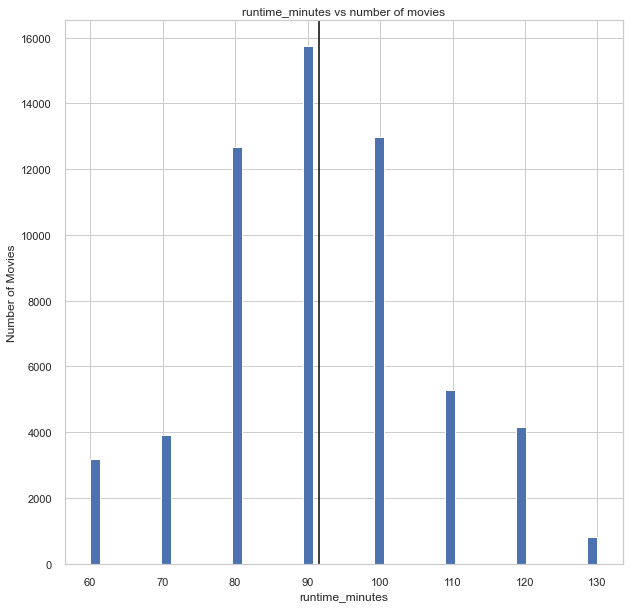

In [137]:
#plot a histogram showing the number of movies and their rounded off runtimes
ax = movie_runtime.runtime_minutes.plot.hist(title ="runtime_minutes vs number of movies",figsize=(10,10), bins = 50)
mean = runtime_genre_rating['runtime_minutes'].mean()
ax.set_xlabel('runtime_minutes')
ax.axvline(mean, color="black")
ax.set_ylabel('Number of Movies');

#### 3.6 Conclusions
* The data analysis did not give us desired results as the correlation was very weak negative which is negligible.
* The visualization 3.5.1 shows us where most movies' run time is and it is a better indicator of what the company can set their goal on. 


In [131]:
writers_rating.head(10)

,primary_name,person_id,movie_id,number_of_movies_rated,total_movie_rating,total_average_rating
0,Andrés Gómez D.,nm7553102,tt4980150,21,170.1,8.100000
1,Juan Gordon,nm7553098,tt4980150,21,170.1,8.100000
2,Jörn Röver,nm1841673,tt1779471,22,170.1,7.731818
3,Jack Kirby,nm0456158,tt0458339,27,197.2,7.303704
4,Sara Hribar,nm2543803,tt2255032,25,180.6,7.224000
5,Mark Monroe,nm0598531,tt1262986,42,303.2,7.219048
6,Ryan Henry Knight,nm9160937,tt4050462,85,613.6,7.218824
7,Vlatka Vorkapic,nm1204572,tt1723793,24,173.2,7.216667
8,Pete Navarro,nm8343598,tt4050462,83,597.6,7.200000
9,Julien Dinse,nm8337609,tt4050462,83,597.6,7.200000


### **4.0  Recomendations**

#### 4.1 
#### 1. From 1.5 the company should consider the following genres and genre combinations as a good place to start as they have a good average rating and are more likely to suceed; 
   **Genre - Rating**  
* Biography,Documentary,Drama - **7.5**
* Biography,Documentary,History- **7.4**
* Documentary,Music           - **7.4**
* Documentary,History         - **7.4**
* Documentary,Drama           - **7.3**
* Documentary                 - **7.3**
* Biography,Documentary       - **7.2**
* Drama,Family                - **6.6**
* Drama                       - **6.5**


#### 2. The company should  consider the following directors as they have the experience in producing highly rated movies.

**Directors - Rating**
*   Dennis Korbylo	          - **9.0**
*	Erin Korbylo	          - **9.0**
*	Sylvia Broeckx	          - **9.0**
*	Joe Russo	              - **8.2**
*	Anthony Russo	          - **8.2**
*	Pauli Janhunen Calderón	  - **8.1**
*	S.S. Rajamouli	          - **7.9**
*	Sukumar	                  - **7.9**
*	Declan Lynch	          - **7.6**
*	Rich Moore	              - **7.5**

#### 3.  The company should consider the following adopting the works of the following writers as they have the experience in writing works that have high average ratings.


**Writers - Rating**
* Andrés Gómez D.	          - **8.1**
* Juan Gordon		          - **8.1**
* Jörn Röver		          - **7.7**
* Jack Kirby		          - **7.3**
* Sara Hribar		          - **7.2**
* Mark Monroe		          - **7.2**
* Ryan Henry Knight	          - **7.2**
* Vlatka Vorkapic	          - **7.2**
* Pete Navarro		          - **7.2**
* Julien Dinse		          - **7.2**


#### **4.2 - Production Budget**
* The data analysis done in 2.3 indicates that the production budget has a strong positive correlation with both total gross revenues and gross profits. The scatter plot 2.4.1 confirms the correlation in that the more the production money the more the total gross revenues and gross profits. The company should consider investing a substantial amount to the production budget so that the business can gain financially.
* As the mean production budget would indicate that most shows have a budget of around $34M in the barplot 2.4.2, the scatterplot 2.4.1 strongly supports the fact that shows with budgets going into hundreds of millions tend to be more succesful in terms of profits. 

#### **4.3 - Run Time**
* This data exploration and analysis went ahead to figure out if the running time of a show has any effect on the ratings and it found a very weak negative correlation which is was negligible at that point. The next step was to look at the mean and at what runtime did most shows go up to. This study's findings were that most shows ran a maximum of 90 minutes(Barplot 3.5.1) and the recomendation to the company would be to ensure their runtimes are within that number to ensure the production of succesfull shows.